# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [1]:
import pandas as pd
covid_df = pd.read_csv('01-16-2021.csv')
covid_df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-17 05:22:17,33.93911,67.709953,53938,2336,45465,6137,Afghanistan,138.557150,4.330898
1,NaN,NaN,NaN,Albania,2021-01-17 05:22:17,41.15330,20.168300,67216,1270,40090,25856,Albania,2335.673084,1.889431
2,NaN,NaN,NaN,Algeria,2021-01-17 05:22:17,28.03390,1.659600,103611,2831,70373,30407,Algeria,236.279443,2.732335
3,NaN,NaN,NaN,Andorra,2021-01-17 05:22:17,42.50630,1.521800,9038,91,8116,831,Andorra,11697.405035,1.006860
4,NaN,NaN,NaN,Angola,2021-01-17 05:22:17,-11.20270,17.873900,18765,431,16225,2109,Angola,57.095013,2.296829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,NaN,NaN,Unknown,Ukraine,2021-01-17 05:22:17,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
4009,NaN,NaN,NaN,Nauru,2021-01-17 05:22:17,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
4010,NaN,NaN,Niue,New Zealand,2021-01-17 05:22:17,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
4011,NaN,NaN,NaN,Tuvalu,2021-01-17 05:22:17,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [2]:
covid_df.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-17 05:22:17,33.93911,67.709953,53938,2336,45465,6137,Afghanistan,138.557150,4.330898
1,NaN,NaN,NaN,Albania,2021-01-17 05:22:17,41.15330,20.168300,67216,1270,40090,25856,Albania,2335.673084,1.889431
2,NaN,NaN,NaN,Algeria,2021-01-17 05:22:17,28.03390,1.659600,103611,2831,70373,30407,Algeria,236.279443,2.732335
3,NaN,NaN,NaN,Andorra,2021-01-17 05:22:17,42.50630,1.521800,9038,91,8116,831,Andorra,11697.405035,1.006860
4,NaN,NaN,NaN,Angola,2021-01-17 05:22:17,-11.20270,17.873900,18765,431,16225,2109,Angola,57.095013,2.296829


#### Show the information of the dataset

In [3]:
covid_df.info()
covid_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4013 non-null   object 
 4   Last_Update          4013 non-null   object 
 5   Lat                  3923 non-null   float64
 6   Long_                3923 non-null   float64
 7   Confirmed            4013 non-null   int64  
 8   Deaths               4013 non-null   int64  
 9   Recovered            4013 non-null   int64  
 10  Active               4013 non-null   int64  
 11  Combined_Key         4013 non-null   object 
 12  Incident_Rate        3923 non-null   float64
 13  Case_Fatality_Ratio  3964 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 439.1+ KB


,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3266.000000,3923.000000,3923.000000,4.013000e+03,4013.000000,4.013000e+03,4.013000e+03,3923.000000,3964.000000
mean,32401.272811,35.756147,-71.140990,2.364164e+04,526.112883,1.296638e+04,1.069133e+04,6549.090009,2.382544
std,18033.806874,13.413390,55.239729,1.183157e+05,3108.326139,8.865015e+04,6.875608e+04,3493.575799,26.778258
min,66.000000,-71.949900,-178.116500,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,19049.500000,33.201461,-96.588297,8.300000e+02,11.000000,0.000000e+00,6.810000e+02,4211.430391,1.001029
50%,30068.000000,37.901449,-86.717326,2.285000e+03,37.000000,0.000000e+00,1.922000e+03,6825.038291,1.573427
75%,47040.500000,42.180139,-77.358304,8.834000e+03,128.000000,0.000000e+00,5.615000e+03,8818.937742,2.332841
max,99999.000000,71.706900,178.065000,2.922841e+06,96357.000000,2.254052e+06,2.845363e+06,28774.129682,1658.558559


#### Show the sum of missing values of features in the dataset

In [4]:
covid_df.isnull().sum()

FIPS                   747
Admin2                 742
Province_State         178
Country_Region           0
Last_Update              0
Lat                     90
Long_                   90
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           90
Case_Fatality_Ratio     49
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [5]:
confirmed_by_country = covid_df.groupby('Country_Region')['Confirmed'].sum().reset_index()
confirmed_by_country

,Country_Region,Confirmed
0,Afghanistan,53938
1,Albania,67216
2,Algeria,103611
3,Andorra,9038
4,Angola,18765
...,...,...
195,West Bank and Gaza,151569
196,Winter Olympics 2022,0
197,Yemen,2112
198,Zambia,36074


#### Show the number of Deaths by Country

In [6]:
Deaths_by_country = covid_df.groupby("Country_Region")["Deaths"].sum().reset_index()
Deaths_by_country

,Country_Region,Deaths
0,Afghanistan,2336
1,Albania,1270
2,Algeria,2831
3,Andorra,91
4,Angola,431
...,...,...
195,West Bank and Gaza,1700
196,Winter Olympics 2022,0
197,Yemen,612
198,Zambia,537


#### Show the number of Recovered cases by Country

In [7]:
Recoverd_cases = covid_df.groupby("Country_Region")["Recovered"].sum().reset_index()
Recoverd_cases

,Country_Region,Recovered
0,Afghanistan,45465
1,Albania,40090
2,Algeria,70373
3,Andorra,8116
4,Angola,16225
...,...,...
195,West Bank and Gaza,138495
196,Winter Olympics 2022,0
197,Yemen,1419
198,Zambia,25106


#### Show the number of Active Cases by Country

In [8]:
Active_cases = covid_df.groupby("Country_Region")["Active"].sum().reset_index()
Active_cases

,Country_Region,Active
0,Afghanistan,6137
1,Albania,25856
2,Algeria,30407
3,Andorra,831
4,Angola,2109
...,...,...
195,West Bank and Gaza,11374
196,Winter Olympics 2022,0
197,Yemen,81
198,Zambia,10431


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [9]:
Data_ln = covid_df.groupby('Country_Region').sum().reset_index()
latest_number_df = Data_ln[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
latest_number_df

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,53938,2336,45465,6137
1,Albania,67216,1270,40090,25856
2,Algeria,103611,2831,70373,30407
3,Andorra,9038,91,8116,831
4,Angola,18765,431,16225,2109
...,...,...,...,...,...
195,West Bank and Gaza,151569,1700,138495,11374
196,Winter Olympics 2022,0,0,0,0
197,Yemen,2112,612,1419,81
198,Zambia,36074,537,25106,10431


### Question 3

### Show the countries with no recovered cases

In [10]:
Not_recovered = covid_df[covid_df['Recovered'] == 0]['Country_Region'].unique()
Not_recovered


array(['Australia', 'Belgium', 'Canada', 'Colombia', 'Germany', 'India',
       'Mexico', 'Netherlands', 'Peru', 'Serbia', 'Spain', 'Sweden', 'US',
       'United Kingdom', 'China', 'Kiribati', 'Palau', 'New Zealand',
       'Summer Olympics 2020', 'Malaysia', 'Tonga',
       'Winter Olympics 2022', 'Antarctica', 'Korea, North', 'Ukraine',
       'Nauru', 'Tuvalu'], dtype=object)

#### Show the countries with no confirmed cases

In [11]:
Not_confirmed = covid_df[covid_df['Confirmed'] == 0]['Country_Region'].unique()
Not_confirmed


array(['Canada', 'Colombia', 'India', 'Mexico', 'Peru', 'Spain', 'US',
       'United Kingdom', 'Kiribati', 'Palau', 'New Zealand',
       'Summer Olympics 2020', 'Malaysia', 'Tonga',
       'Winter Olympics 2022', 'Antarctica', 'Korea, North', 'Ukraine',
       'Nauru', 'Tuvalu'], dtype=object)

#### Show the countries with no deaths

In [12]:
No_deaths = covid_df[covid_df['Deaths'] == 0]['Country_Region'].unique()

In [13]:
No_deaths 

array(['Australia', 'Belgium', 'Cambodia', 'Canada', 'China', 'Colombia',
       'Denmark', 'Dominica', 'France', 'Germany', 'Holy See', 'India',
       'Japan', 'Laos', 'Marshall Islands', 'Mexico', 'Peru', 'Russia',
       'Saint Kitts and Nevis', 'Samoa', 'Solomon Islands', 'Spain',
       'Timor-Leste', 'US', 'United Kingdom', 'Vanuatu', 'Kiribati',
       'Palau', 'New Zealand', 'Summer Olympics 2020', 'Malaysia',
       'Tonga', 'Winter Olympics 2022', 'Antarctica', 'Korea, North',
       'Ukraine', 'Nauru', 'Tuvalu'], dtype=object)

### Question 4

#### Show the Top 10 countries with Confirmed cases

In [14]:
top_confirmed_cases = confirmed_by_country.sort_values(by='Confirmed',ascending=False).head(10)
top_confirmed_cases

,Country_Region,Confirmed
185,US,23965036
80,India,10557985
24,Brazil,8460987
146,Russia,3507201
189,United Kingdom,3367060
63,France,2952392
183,Turkey,2380665
86,Italy,2368733
166,Spain,2252164
67,Germany,2029605


#### Show the Top 10 Countries with Active cases

In [15]:
top_active = Active_cases.sort_values(by='Active',ascending=False).head(10)
top_active

,Country_Region,Active
185,US,23517669
189,United Kingdom,3270461
63,France,2668115
166,Spain,2048474
117,Mexico,1490017
140,Peru,959371
127,Netherlands,894860
24,Brazil,759940
17,Belgium,665437
86,Italy,557717


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

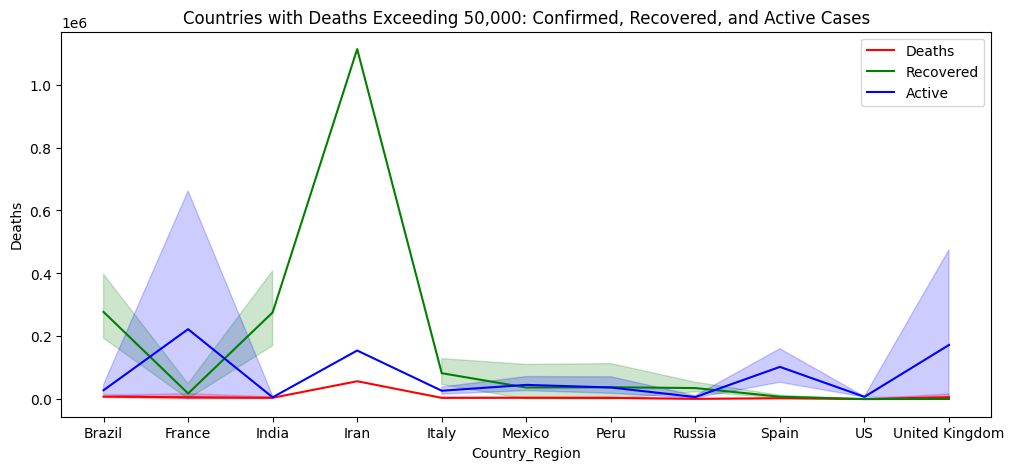

In [17]:
country_above_50k_deaths = Deaths_by_country[Deaths_by_country['Deaths'] > 50000]['Country_Region']
fltrd_df = covid_df[covid_df['Country_Region'].isin(country_above_50k_deaths)]
plt.figure(figsize=(12, 5))
sns.lineplot(data=fltrd_df, x='Country_Region', y='Deaths', color='red', label='Deaths')
sns.lineplot(data=fltrd_df, x='Country_Region', y='Recovered', color='green', label='Recovered')
sns.lineplot(data=fltrd_df, x='Country_Region', y='Active', color='blue', label='Active')
plt.title('Countries with Deaths Exceeding 50,000: Confirmed, Recovered, and Active Cases')

plt.show()




### Question 6

### Plot Province/State wise Deaths in USA

In [18]:
import plotly.express as px

In [19]:
Usa_df = covid_df[covid_df["Country_Region"] == 'US']


In [20]:

Usa_death_fig = px.bar(Usa_df,x="Province_State", y='Deaths', title="Death by province in USA", width=1200.0,height=500.0)
Usa_death_fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [21]:
Usa_active_fig = px.bar(Usa_df,x="Province_State", y='Active', title="Active cases per province in USA", width=1200.0,height=500.0)
Usa_active_fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [22]:
Usa_confirmed_fig = px.bar(Usa_df,x="Province_State", y='Confirmed', title="Confirmed cases per province in USA", width=1200.0,height=500.0)
Usa_confirmed_fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [23]:
import plotly.express as px
import plotly.io as pio
import pandas as pd

In [24]:
Worldwide_cases_df = pd.read_csv("01-16-2021.csv")
Worldwide_cases_df['Date'] = pd.to_datetime(Worldwide_cases_df['Last_Update'])
Confirmed_over_time = Worldwide_cases_df.groupby("Date")["Confirmed"].sum().reset_index()


In [25]:
fig = px.line(Confirmed_over_time, x='Date', y='Confirmed', title='Worldwide Confirmed COVID-19 Cases Over Time')
fig.show()